In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273
┌ Info: Precompiling SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b]
└ @ Base loading.jl:1273
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t))
    x[1]=x0
    for i=1:length(t)-1
        x0=x0-(x0*γ*Δt)+(sqrt(2*Δt)*randn())
        @inbounds x[1+i]=x0
    end
    return x
end

OUH (generic function with 1 method)

  0.000847 seconds (8.79 k allocations: 311.266 KiB)


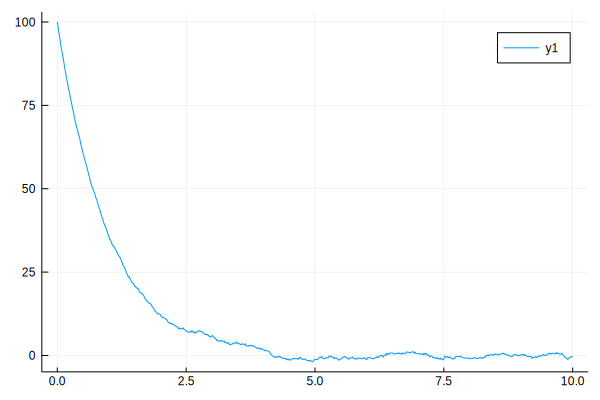

In [84]:
@time begin
    Δt=0.01
    N=10.0
    x0=100.0
    γ=1.0
    t=0:Δt:N
    K=OUH(x0,γ,t,Δt)
    plot(t,K)
end

In [4]:
function eigen2(n::Int64,K::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(2))
    for i=1:n
       R=(diagm(0 => ones(2))+diagm(1 => [K[i]]*Δs,-1 => -[K[i]]*Δs)+(0.5*diagm(1 => [K[i]]*Δs,-1 => -[K[i]]*Δs)^2))*R
    end
    eigen(R)
end

eigen2 (generic function with 1 method)

In [5]:
@time begin
    γ=1.0
    x0=0.0
    Δt=0.1
    N=1
    t=0:Δt:N
    Δs=Δt
    K=OUH(x0,γ,t,Δt)
    F=eigen2(length(t),K,Δs)
end

  1.922709 seconds (6.47 M allocations: 310.186 MiB, 5.31% gc time)


Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
2-element Array{Complex{Float64},1}:
 0.979623430175333 - 0.20085086616457168im
 0.979623430175333 + 0.20085086616457168im
eigenvectors:
2×2 Array{Complex{Float64},2}:
      0.0+0.707107im       0.0-0.707107im
 0.707107-0.0im       0.707107+0.0im     

In [6]:
function lam_eigenvals(γ::Float64,x0::Float64,Δt::Float64,t::AbstractArray,Δs::Float64,tiradas::Int64)
    λ=Vector{Complex{Float64}}(undef,2*tiradas)
    for i=1:tiradas
        K=OUH(x0,γ,t,Δt)
        a=eigen2(length(t),K,Δs).values
        @inbounds λ[2*i-1]=a[1]
        @inbounds λ[2*i-0]=a[2]
    end
    return λ
end

lam_eigenvals (generic function with 1 method)

In [59]:
γ=1.0
tiradas=500
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
step=20 #Para animar
length(1:step:length(t))


101

In [60]:
@time λ=lam_eigenvals(γ,x0,Δt,t,Δs,tiradas);

  3.529529 seconds (51.04 M allocations: 2.499 GiB, 11.28% gc time)


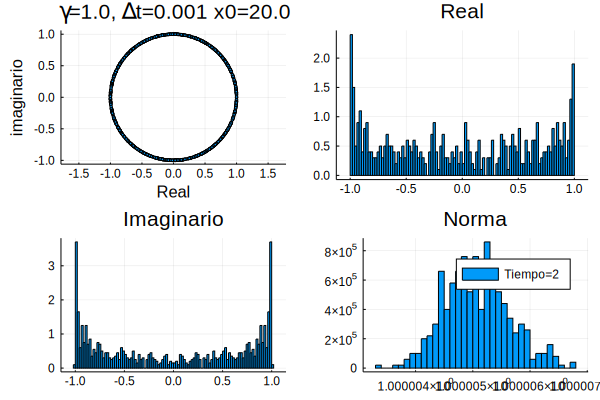

In [61]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)")
Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(N)",title="Norma")
plot(Q1,Q2,Q3,Q4,layout=l)

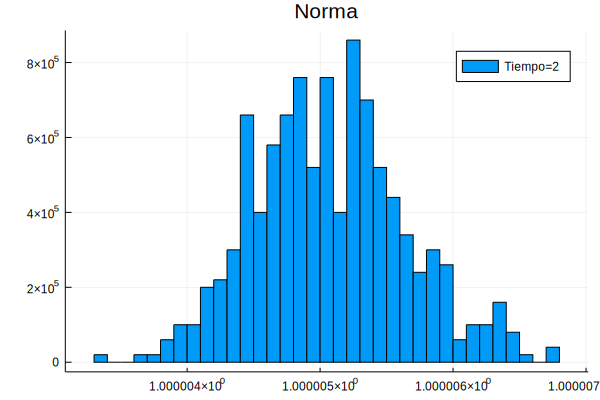

In [64]:
histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(N)",title="Norma")

190.660619 seconds (2.59 G allocations: 126.871 GiB, 10.35% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\Animacion_Prueba_2D.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\Animacion_Prueba_2D.gif")
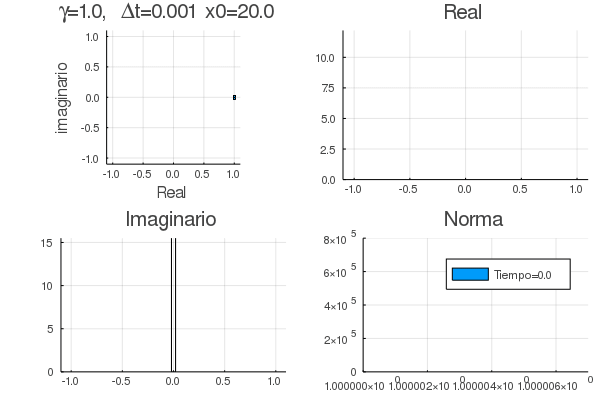

In [65]:
@time begin    
    anim= @animate for j=1:step:length(t)
        λ=lam_eigenvals(γ,x0,Δt,t[1:j],Δs,tiradas);
        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100,xlims=(-1.1,1.1),ylims=(0,15.5))
        Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100,xlims=(-1.1,1.1),ylims=(0,12.2))
        Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)",xlims=(-1.1,1.1),ylims=(-1.1,1.1))
        Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Norma",xlims=(1,1.000007),ylims=(0,8e5))
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./Animacion_Prueba_2D.gif", fps=120)
end

In [67]:
function Mat(n::Int64,K::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(2))
    for i=1:n
       R=(diagm(0 => ones(2))+diagm(1 => [K[i]]*Δs,-1 => -[K[i]]*Δs)+(0.5*diagm(1 => [K[i]]*Δs,-1 => -[K[i]]*Δs)^2))*R
    end
    R
end

Mat (generic function with 1 method)

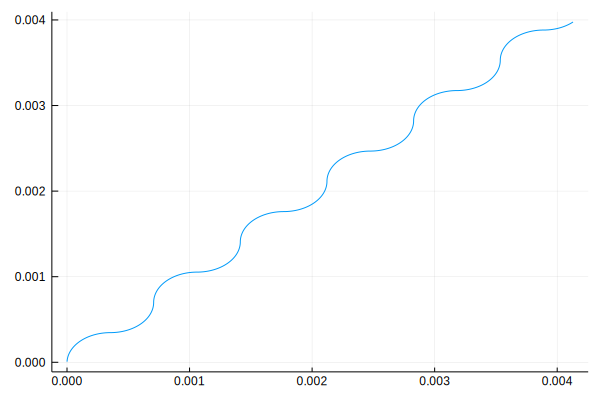

In [89]:
γ=1.0
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
K=OUH(x0,γ,t,Δt);
#K=ones(2001)*5
T0=(eigen2(2,K,Δs).vectors)[:,2]
N0=(eigen2(2,K,Δs).vectors)[:,1]*im


T=Array{Float64,1}[]
N=Array{Float64,1}[]
for i=1:length(t)
    T1=Mat(i,K,Δs)*T0
    N1=Mat(i,K,Δs)*N0
    push!(T,real(T1))
    push!(N,real(N1))
end
T=transpose(hcat(T...))
N=transpose(hcat(N...));

Tx=T[:,1]
Ty=T[:,2]

rx=Float64[]
ry=Float64[]
r1x=0.0
r1y=0.0
for i=1:length(t)-1
    r1x=(abs(Tx[i]-Tx[i+1])/2)*Δs+r1x
    r1y=(abs(Ty[i]-Ty[i+1])/2)*Δs+r1y
    push!(rx,r1x)
    push!(ry,r1y)
end
plot(rx,ry,legend=false)

In [16]:
real(N0)

2-element Array{Float64,1}:
 0.0               
 0.7071067811865475

In [269]:
N1=Mat(2,K,Δs)*N0

2-element Array{Complex{Float64},1}:
 8.481006076865665e-6 + 0.707106781135687im   
    0.707106781135687 - 8.481006076865665e-6im

In [48]:
A=randn(2,2)

2×2 Array{Float64,2}:
 0.479472  -0.176033
 0.922303   2.2652  

In [49]:
A2=eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 0.5755602679697813
 2.169115409370756 
eigenvectors:
2×2 Array{Float64,2}:
 -0.877747   0.103622
  0.479124  -0.994617

In [50]:
eva=A2.values[1]

0.5755602679697813

In [51]:
eve=A2.vectors[:,1]

2-element Array{Float64,1}:
 -0.8777471325172301
  0.4791241711266296

In [52]:
A*eve

2-element Array{Float64,1}:
 -0.5051963748013241
  0.2757648363244424

In [53]:
eva*eve

2-element Array{Float64,1}:
 -0.5051963748013242 
  0.27576483632444226